### CHEM E 545 Homework 6 (30 points) 

Gregory Moore

##### Load the cirrhosis dataset as provided in the .csv file.  Visualize the distribution of the target variable. Do any processing of the data that you feel is important for classification downstream (5 points)

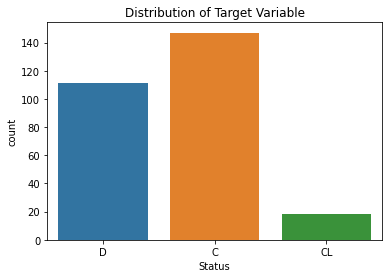

In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Read in the CSV and drop all rows that have an NaN anywhere in them
df = pd.read_csv('cirrhosis.csv').dropna(how='any')

#visualize distribution of target variable
import seaborn as sns
sns.countplot(x='Status', data=df)
plt.title('Distribution of Target Variable')

#Map the Y/N columns to numerical data (N is 0, Y is 1)
yes_no = {'N' : 0, 'Y': 1}
df['Ascites'] = df['Ascites'].replace(yes_no)
df['Hepatomegaly'] = df['Hepatomegaly'].replace(yes_no)
df['Spiders'] = df['Spiders'].replace(yes_no)

#Map the M/F columns to numerical data (F is 0, M is 1)
male_female = {'F' : 0, 'M':1}
df['Sex'] = df['Sex'].replace(male_female)

#Get dummy variables for the remaining two features which are represented by strings: Edema, and Drug
df = pd.get_dummies(df, columns=['Edema'], prefix='Edema')
df = pd.get_dummies(df, columns=['Drug'],prefix='Drug')

#Replace the Status Column with Numbers
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Status'] = label.fit_transform(df['Status'])

#Apply standard scaler to certain columns where applicable 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['N_Days','Age','Bilirubin','Cholesterol','Albumin',
    'Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']] = scaler.fit_transform(df[['N_Days','Age','Bilirubin','Cholesterol','Albumin',
                                                                                                          'Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']])

In [48]:
df

,ID,N_Days,Status,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_S,Edema_Y,Drug_D-penicillamine,Drug_Placebo
0,1,-1.422207,2,0.853538,0,1,1,1,2.431300,-0.470471,...,0.244286,0.721609,-0.772071,1.455055,4.0,0,0,1,1,0
1,2,2.270278,0,0.632769,0,0,1,1,-0.486355,-0.295529,...,-0.187209,-0.567479,-0.438594,-0.134634,3.0,1,0,0,1,0
2,3,-0.871036,2,1.930016,1,0,0,0,-0.421034,-0.833157,...,-0.494890,-1.073906,-1.191607,1.256344,4.0,0,1,0,1,0
3,4,-0.048783,2,0.470385,0,0,1,1,-0.333940,-0.543008,...,-1.121379,-0.506093,-0.847372,-0.432701,4.0,0,1,0,1,0
4,5,-0.427938,1,-1.113314,0,0,1,1,0.014437,-0.393667,...,-0.193744,-0.813019,-1.352966,0.163433,3.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,-0.744051,0,1.083691,0,0,1,0,-0.638769,-0.534475,...,-0.584969,-0.183822,0.282146,-0.333345,2.0,1,0,0,1,0
308,309,-0.887247,0,0.809228,0,0,0,0,-0.638769,-0.474738,...,-0.955881,-0.659556,-0.331021,0.064077,2.0,1,0,0,0,1
309,310,-0.936780,0,1.193163,0,0,0,0,-0.355713,0.267701,...,0.828032,-0.383323,-0.298749,-0.532056,2.0,1,0,0,1,0
310,311,-1.026841,0,-1.123479,0,0,0,0,-0.290393,-0.530208,...,-0.125744,-0.567479,0.787740,-0.233990,2.0,1,0,0,1,0


##### Apply decision tree classifier on the resulting data. Print the accuracy of the model on the test set. Also visualize the decision tree as a graph. (5 points)

Accuracy on training 0.741
Accuracy on test 0.821


[Text(0.5, 0.8333333333333334, 'X[6] <= -0.301\ngini = 0.561\nsamples = 220\nvalue = [117, 18, 85]'),
 Text(0.25, 0.5, 'X[0] <= -1.047\ngini = 0.379\nsamples = 122\nvalue = [93, 5, 24]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.329\nsamples = 116\nvalue = [93, 4, 19]'),
 Text(0.75, 0.5, 'X[1] <= -0.535\ngini = 0.535\nsamples = 98\nvalue = [24, 13, 61]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.659\nsamples = 37\nvalue = [15, 11, 11]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.305\nsamples = 61\nvalue = [9, 2, 50]')]

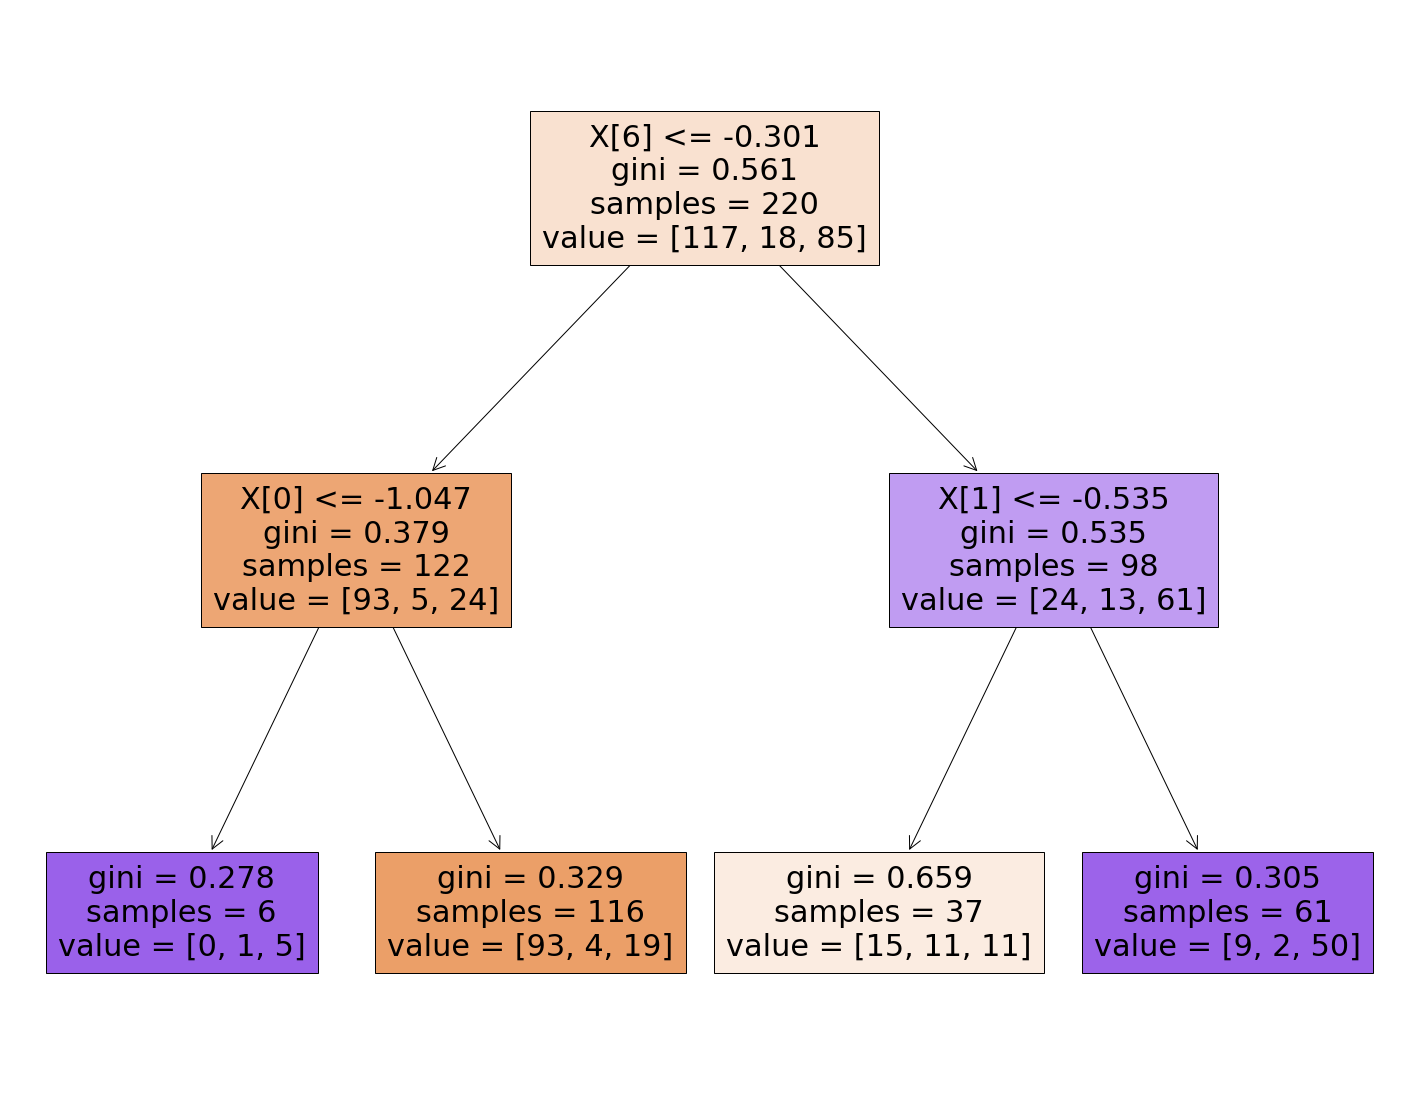

In [49]:
#Divide the data into X features and Y target variable, and perform train/test splitting with a test_size of 20%
X_cir = df.drop(['ID','Status'], axis=1)
Y_cir = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X_cir, Y_cir, test_size = 0.20, random_state=42)

#Import necessary packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
np.random.seed(42)

#Apply decision tree classifier on the data and print the accuracy score of the model on the test data 
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X_train, y_train)

print('Accuracy on training {:.3f}'.format(tree_clf.score(X_train, y_train)))
print('Accuracy on test {:.3f}'.format(tree_clf.score(X_test, y_test)))

#Use tree.plot_tree to visualize the decision tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(tree_clf,filled=True)

##### Next, compare the performance of decision tree model with the three ensemble methods we learnt in class. Describe your results (10 points) 

In [50]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50,random_state=42)
forest.fit(X_train, y_train)
print('Random Forest Accuracy on training {:.3f}'.format(forest.score(X_train, y_train)))
print('Random Forest Accuracy on test {:.3f}'.format(forest.score(X_test, y_test)))
print('')

#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=30,learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
print('AdaBoost Accuracy on training {:.3f}'.format(ada_clf.score(X_train, y_train)))
print('AdaBoost Accuracy on test {:.3f}'.format(ada_clf.score(X_test, y_test)))
print('')

#Bootstrap Aggregating
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('Bootstrap Accuracy on training {:.3f}'.format(bag_clf.score(X_train, y_train)))
print('Bootstrap Accuracy on test {:.3f}'.format(bag_clf.score(X_test, y_test)))



Random Forest Accuracy on training 1.000
Random Forest Accuracy on test 0.786

AdaBoost Accuracy on training 0.818
AdaBoost Accuracy on test 0.750

Bootstrap Accuracy on training 0.932
Bootstrap Accuracy on test 0.786


##### Choose the best type of classifier and optimize its hyperparamters to get the best performance (10 points)

In [51]:
#Choosing the Random Forest hyperparameters
from sklearn.model_selection import GridSearchCV
forest_optimal = RandomForestClassifier(random_state=42)
parameters_dict = {'n_estimators' : [10,25,50,75],
                   'max_depth' : [3,6,9,12,None],
                   'max_leaf_nodes': [2,3,4,None] ,
                   'max_features' : ['sqrt','log2',None]
                  }
#initializing gridsearch object
grid_search = GridSearchCV(forest_optimal, parameters_dict, scoring='accuracy',
                           return_train_score=True, cv=5, verbose=1) 
#fitting the grid search to X_train and y_train
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 6, 9, 12, None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [2, 3, 4, None],
                         'n_estimators': [10, 25, 50, 75]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [60]:
#Reporting back the best model, best parameters, and best score 
best_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Model is " + str(best_model))
print("Best Parameters are " + str(best_parameters))
print("Best Score = " + str(best_score))

Best Model is RandomForestClassifier(max_depth=9, max_features=None, n_estimators=25,
                       random_state=42)
Best Parameters are {'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'n_estimators': 25}
Best Score = 0.7681818181818183


##### Extract the feature importance scores from the chosen model and use only the top 5 features with the best model parameters to create the final model. Report both the training and test accuracy. (5 points)


Text(0, 0.5, 'MDI')

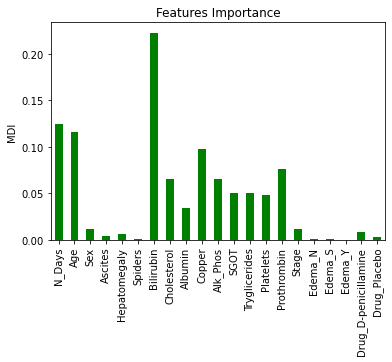

In [53]:
#Creating the best RF classifier using the best parameters determined using GridSearchCV in the previous step
best_forest = RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=None, n_estimators=25, random_state=42)
#fitting the best model on X_train and Y_train
best_forest.fit(X_train, y_train)
best_forest_features = best_forest.feature_importances_

#Create a list of all of the feature names 
feature_names = list(X_cir.columns.values)
#Create a pd.Series with the values of all the best forest features, indexed with their corresponding feature names
best_features = pd.Series(best_forest_features, index=feature_names)

#Plot the feature importances
fig, ax = plt.subplots()
best_features.plot.bar(color='Green')
ax.set_title("Features Importance")
ax.set_ylabel("MDI")

In [55]:
#Create a model using the 5 most important features as found in the above step
#5 Most Important Features: N_days, Age, Bilirubin, Copper, Prothrombin
X_cir_best_features = X_cir[['N_Days','Age','Bilirubin','Copper','Prothrombin']]

#Train test splitting with the best features
final_X_train, final_X_test, final_y_train, final_y_test = train_test_split(X_cir_best_features, Y_cir, test_size = 0.20, random_state=42)

final_forest = RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=None, n_estimators=25, random_state=42)
final_forest.fit(final_X_train, final_y_train)
print('Final Random Forest Accuracy on training {:.3f}'.format(final_forest.score(final_X_train, final_y_train)))
print('Final Random Forest Accuracy on test {:.3f}'.format(final_forest.score(final_X_test, final_y_test)))

Final Random Forest Accuracy on training 0.982
Final Random Forest Accuracy on test 0.786
